<center><h1> Predicting House Prices</h1></center>


<img src=http://www.cornwalltaichi.co.uk/wp-content/uploads/2014/02/Exeter_panorama_1.jpg height="42" width="900">

### Table of Contents
1. Importing Modules, Reading the Dataset and Defining an Evaluation Matrix
2. Defining a Function to Calculate the Adjusted  R2 
3. Creating a Simple Regression
    - Let's Show the Results
4. Examining and Adding More Features
    - Checking Out the Correlation Among Explanatory Variables
    - Complex Model - 1
    - Complex Model - 2
5. Polynomial Regression
6. KNN Regression
7. Conclusion

### Let's import some important libraries

In [42]:
# Importing the modules 
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Mean Squared Error (MSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[]})

# Reading Data 
df = pd.read_csv('/resources/data/kc_house_data.csv')
#df.info()
#df.describe()
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Defining a Function to Calculate the Adjusted  R2 




In [43]:
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

# Simple Regression-One Variable


In [44]:
# splitting data
train_data,test_data = train_test_split(df,train_size = 0.8,random_state=3)
# Linear Model 
lm = linear_model.LinearRegression()
X_train = np.array(train_data['sqft_living'], dtype=pd.Series).reshape(-1,1)
y_train = np.array(train_data['price'], dtype=pd.Series)
# fitting the linear model
lm.fit(X_train,y_train)

# Evaluate the simple model
X_test = np.array(test_data['sqft_living'], dtype=pd.Series).reshape(-1,1)
y_test = np.array(test_data['price'], dtype=pd.Series)

pred = lm.predict(X_test)
msesm = format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f')
rtrsm = format(lm.score(X_train, y_train),'.3f')
rtesm = format(lm.score(X_test, y_test),'.3f')

print ("Average Price for Test Data: {:.3f}".format(y_test.mean()))
print('Intercept: {}'.format(lm.intercept_))
print('Coefficient: {}'.format(lm.coef_))

r = evaluation.shape[0]
evaluation.loc[r] = ['Simple Model','-',msesm,rtrsm,'-',rtesm,'-']
evaluation

Average Price for Test Data: 539744.130
Intercept: -47235.81130290113
Coefficient: [282.2468152]


/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


,Adjusted R-squared (test),Adjusted R-squared (training),Details,Mean Squared Error (MSE),Model,R-squared (test),R-squared (training)
0,Simple Model,-,254289.149,0.492,-,0.496,-


### Let's Visualize the Results



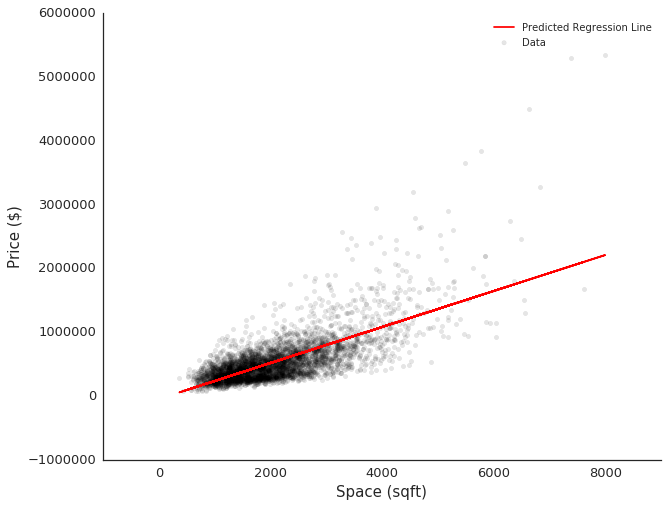

In [45]:
plt.figure(figsize=(10,8))
plt.scatter(X_test,y_test,color='black',label="Data", alpha=.1)
plt.plot(X_test,lm.predict(X_test),color="red",label="Predicted Regression Line")
plt.xlabel("Space (sqft)", fontsize=15)
plt.ylabel("Price ($)", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

### Examining and Adding More Features


In [46]:
sns.set(style="white", font_scale=1)

### Checking Out the Correlation Among Explanatory Variables

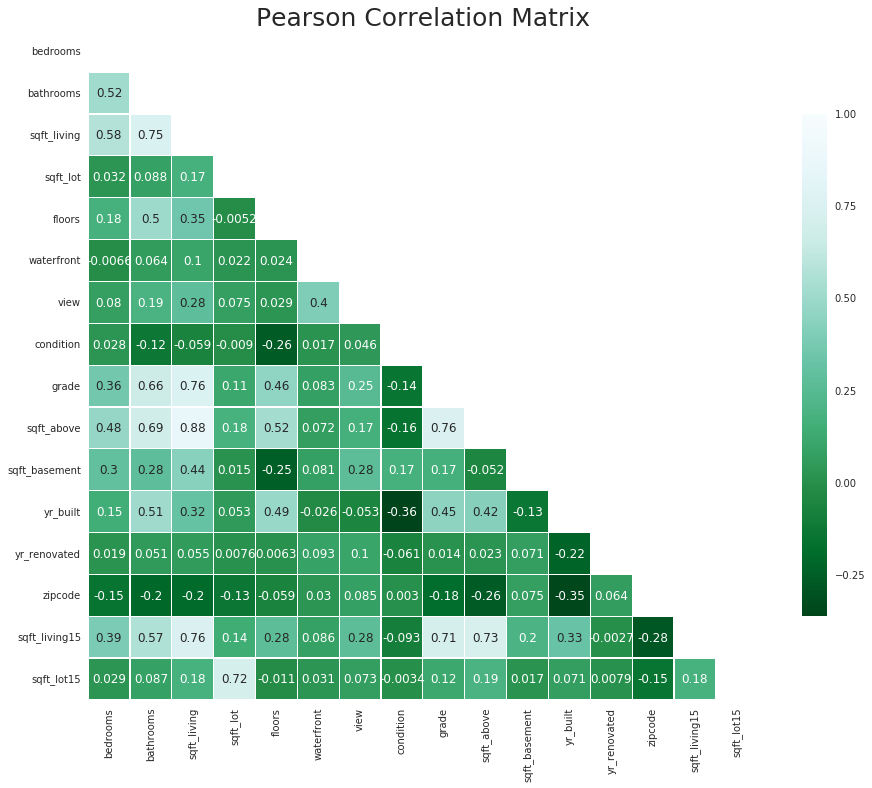

In [47]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
            'condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','sqft_living15','sqft_lot15']

mask = np.zeros_like(df[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df[features].corr(), linewidths=0.25, vmax=1.0, square=True, cmap="BuGn_r", linecolor='w', annot=True, 
            mask=mask, cbar_kws={"shrink": .75})

# Multiple Linear Regression-Complex Model 1

In [48]:
# Linear model with more features
features1 = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']
mlr = linear_model.LinearRegression()
mlr.fit(train_data[features1],train_data['price'])

print('Intercept: {}'.format(mlr.intercept_))
print('Coefficients: {}'.format(mlr.coef_))

pred1 = mlr.predict(test_data[features1])
msecm1 = format(np.sqrt(metrics.mean_squared_error(y_test,pred1)),'.3f')
rtrcm1 = format(mlr.score(train_data[features1],train_data['price']),'.3f')
artrcm1 = format(adjustedR2(mlr.score(train_data[features1],train_data['price']),train_data.shape[0],len(features1)),'.3f')
rtecm1 = format(mlr.score(test_data[features1],test_data['price']),'.3f')
artecm1 = format(adjustedR2(mlr.score(test_data[features1],test_data['price']),test_data.shape[0],len(features1)),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['Complex Model-1','-',msecm1,rtrcm1,artrcm1,rtecm1,artecm1]
evaluation.sort_values(by = 'R-squared (test)', ascending=False)

Intercept: -57221293.13485921
Coefficients: [-5.68950279e+04  1.13310062e+04  3.18389287e+02 -2.90807628e-01
 -5.79609821e+03  5.84022824e+02]


,Adjusted R-squared (test),Adjusted R-squared (training),Details,Mean Squared Error (MSE),Model,R-squared (test),R-squared (training)
1,Complex Model-1,-,248514.011,0.514,0.514,0.519,0.518
0,Simple Model,-,254289.149,0.492,-,0.496,-


# Complex Model 2

In [49]:
features2 = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
             'grade','yr_built','zipcode']
complex_model_2 = linear_model.LinearRegression()
complex_model_2.fit(train_data[features2],train_data['price'])

print('Intercept: {}'.format(complex_model_2.intercept_))
print('Coefficients: {}'.format(complex_model_2.coef_))

pred2 = complex_model_2.predict(test_data[features2])
msecm2 = format(np.sqrt(metrics.mean_squared_error(y_test,pred2)),'.3f')
rtrcm2 = format(complex_model_2.score(train_data[features2],train_data['price']),'.3f')
artrcm2 = format(adjustedR2(complex_model_2.score(train_data[features2],train_data['price']),train_data.shape[0],len(features2)),'.3f')
rtecm2 = format(complex_model_2.score(test_data[features2],test_data['price']),'.3f')
artecm2 = format(adjustedR2(complex_model_2.score(test_data[features2],test_data['price']),test_data.shape[0],len(features2)),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['Complex Model-2','-',msecm2,rtrcm2,artrcm2,rtecm2,artecm2]
evaluation.sort_values(by = 'R-squared (test)', ascending=False)

Intercept: 13559209.611223986
Coefficients: [-3.80981692e+04  5.03031727e+04  1.71370475e+02 -2.68019419e-01
  2.21944912e+04  5.53865017e+05  4.70338164e+04  1.23642184e+05
 -3.88306990e+03 -6.82180496e+01]


,Adjusted R-squared (test),Adjusted R-squared (training),Details,Mean Squared Error (MSE),Model,R-squared (test),R-squared (training)
2,Complex Model-2,-,210486.689,0.651,0.650,0.655,0.654
1,Complex Model-1,-,248514.011,0.514,0.514,0.519,0.518
0,Simple Model,-,254289.149,0.492,-,0.496,-


# Polynomial Regression

In [50]:
features2 = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
             'grade','yr_built','zipcode']

polyfeat = PolynomialFeatures(degree=2)
X_trainpoly = polyfeat.fit_transform(train_data[features2])
X_testpoly = polyfeat.fit_transform(test_data[features2])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['price'])

predp = poly.predict(X_testpoly)
msepoly1 = format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred)),'.3f')
rtrpoly1 = format(poly.score(X_trainpoly,train_data['price']),'.3f')
rtepoly1 = format(poly.score(X_testpoly,test_data['price']),'.3f')

polyfeat = PolynomialFeatures(degree=3)
X_trainpoly = polyfeat.fit_transform(train_data[features2])
X_testpoly = polyfeat.fit_transform(test_data[features2])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['price'])

predp = poly.predict(X_testpoly)
msepoly2 = format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred)),'.3f')
rtrpoly2 = format(poly.score(X_trainpoly,train_data['price']),'.3f')
rtepoly2 = format(poly.score(X_testpoly,test_data['price']),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['Polynomial Regression','degree=2',msepoly1,rtrpoly1,'-',rtepoly1,'-']
evaluation.loc[r+1] = ['Polynomial Regression','degree=3',msepoly2,rtrpoly2,'-',rtepoly2,'-']
evaluation.sort_values(by = 'R-squared (test)', ascending=False)

,Adjusted R-squared (test),Adjusted R-squared (training),Details,Mean Squared Error (MSE),Model,R-squared (test),R-squared (training)
4,Polynomial Regression,degree=3,254289.149,0.749,-,0.722,-
3,Polynomial Regression,degree=2,254289.149,0.730,-,0.716,-
2,Complex Model-2,-,210486.689,0.651,0.650,0.655,0.654
1,Complex Model-1,-,248514.011,0.514,0.514,0.519,0.518
0,Simple Model,-,254289.149,0.492,-,0.496,-


# KNN Regression

In [51]:
knnreg = KNeighborsRegressor(n_neighbors=10)
knnreg.fit(train_data[features2],train_data['price'])
pred = knnreg.predict(test_data[features2])

mseknn1 = format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f')
rtrknn1 = format(knnreg.score(train_data[features2],train_data['price']),'.3f')
artrknn1 = format(adjustedR2(knnreg.score(train_data[features2],train_data['price']),train_data.shape[0],len(features2)),'.3f')
rteknn1 = format(knnreg.score(test_data[features2],test_data['price']),'.3f')
arteknn1 = format(adjustedR2(knnreg.score(test_data[features2],test_data['price']),test_data.shape[0],len(features2)),'.3f')

knnreg = KNeighborsRegressor(n_neighbors=15)
knnreg.fit(train_data[features2],train_data['price'])
pred = knnreg.predict(test_data[features2])

mseknn2 = format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f')
rtrknn2 = format(knnreg.score(train_data[features2],train_data['price']),'.3f')
artrknn2 = format(adjustedR2(knnreg.score(train_data[features2],train_data['price']),train_data.shape[0],len(features2)),'.3f')
rteknn2 = format(knnreg.score(test_data[features2],test_data['price']),'.3f')
arteknn2 = format(adjustedR2(knnreg.score(test_data[features2],test_data['price']),test_data.shape[0],len(features2)),'.3f')


r = evaluation.shape[0]
evaluation.loc[r] = ['KNN Regression','n_neighbors=10',mseknn1,rtrknn1,artrknn1,rteknn1,arteknn1]
evaluation.loc[r+1] = ['KNN Regression','n_neighbors=15',mseknn2,rtrknn2,artrknn2,rteknn2,arteknn2]
evaluation.sort_values(by = 'R-squared (test)', ascending=False)

,Adjusted R-squared (test),Adjusted R-squared (training),Details,Mean Squared Error (MSE),Model,R-squared (test),R-squared (training)
4,Polynomial Regression,degree=3,254289.149,0.749,-,0.722,-
3,Polynomial Regression,degree=2,254289.149,0.730,-,0.716,-
2,Complex Model-2,-,210486.689,0.651,0.650,0.655,0.654
6,KNN Regression,n_neighbors=15,248268.461,0.580,0.580,0.520,0.519
1,Complex Model-1,-,248514.011,0.514,0.514,0.519,0.518
5,KNN Regression,n_neighbors=10,251676.155,0.611,0.610,0.507,0.506
0,Simple Model,-,254289.149,0.492,-,0.496,-


## Conclusion
From the results obtained from all the different types of regression, we look at the evaluation table, Polynomial Regression is the best. However, each model might be useful depending to the situation.